# National Poll on Healthy Aging

## Downloading data using Kaggle API


In [1]:

import os

!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!pip install kaggle

dataset_name = 'akshatshaw7/national-poll-on-healthy-aging-npha'

!kaggle datasets download -d {dataset_name}


Dataset URL: https://www.kaggle.com/datasets/akshatshaw7/national-poll-on-healthy-aging-npha
License(s): CC-BY-SA-4.0
  0% 0.00/3.89k [00:00<?, ?B/s]
100% 3.89k/3.89k [00:00<00:00, 7.46MB/s]


In [2]:
!unzip -o '*.zip' -d ./national-poll-on-healthy-aging-npha

!ls ./national-poll-on-healthy-aging-npha

Archive:  national-poll-on-healthy-aging-npha.zip
  inflating: ./national-poll-on-healthy-aging-npha/NPHA-doctor-visits.csv  
NPHA-doctor-visits.csv


## Importing Libraries


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


## Data Summary

- ***Number of Doctors Visited:*** The total count of different doctors the patient has seen = {
1: 0-1 doctors,
2: 2-3 doctors,
3: 4 or more doctors
}

- ***Age:*** The patient's age group = {
1: 50-64,
2: 65-80
}

- ***Physical Health:*** A self-assessment of the patient's physical well-being = { -1: Refused,
1: Excellent,
2: Very Good,
3: Good,
4: Fair,
5: Poor
}

- ***Mental Health:*** A self-evaluation of the patient's mental or psychological health = {-1: Refused,
1: Excellent,
2: Very Good,
3: Good,
4: Fair,
5: Poor
}

- ***Dental Health:*** A self-assessment of the patient's oral or dental health= {-1: Refused,
1: Excellent,
2: Very Good,
3: Good,
4: Fair,
5: Poor
}

- ***Employment:*** The patient's employment status or work-related information = {-1: Refused 6,
1: Working full-time,
2: Working part-time,
3: Retired,
4: Not working at this time
}

- ***Stress Keeps Patient from Sleeping***: Whether stress affects the patient's ability to sleep = {
0: No,
1: Yes
}

- ***Medication Keeps Patient from Sleeping:*** Whether medication impacts the patient's sleep = {
0: No,
1: Yes
}

- ***Pain Keeps Patient from Sleeping:*** Whether physical pain disturbs the patient's sleep = {
0: No,
1: Yes
}

- ***Bathroom Needs Keeps Patient from Sleeping:*** Whether the need to use the bathroom affects the patient's sleep = {
0: No,
1: Yes
}

- ***Unknown Keeps Patient from Sleeping:*** Unidentified factors affecting the patient's sleep = {
0: No,
1: Yes
}

- ***Trouble Sleeping:*** General issues or difficulties the patient faces with sleeping = {
0: No,
1: Yes
}

- ***Prescription Sleep Medication:*** Information about any sleep medication prescribed to the patient = {-1: Refused,
1: Use regularly,
2: Use occasionally,
3: Do not use
}

- ***Race:*** The patient's racial or ethnic background = {-2: Not asked,-1: REFUSED,
1: White, Non-Hispanic ,
2: Black, Non-Hispanic ,
3: Other, Non-Hispanic ,
4: Hispanic ,
5: 2+ Races, Non-Hispanic
}
- ***Gender:*** The gender identity of the patient = {-2: Not asked,-1: REFUSED,
1: Male,
2: Female
}


In [6]:
df = pd.read_csv('/content/national-poll-on-healthy-aging-npha/NPHA-doctor-visits.csv')
df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


In [7]:
df.describe()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
count,714.000000,714.0,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.00000
mean,2.112045,2.0,2.794118,1.988796,3.009804,2.806723,0.247899,0.056022,0.218487,0.504202,0.417367,2.407563,2.829132,1.425770,1.55042
std,0.683441,0.0,0.900939,0.939928,1.361117,0.586582,0.432096,0.230126,0.413510,0.500333,0.493470,0.670349,0.546767,1.003896,0.49780
min,1.000000,2.0,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.00000
25%,2.000000,2.0,2.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.00000
50%,2.000000,2.0,3.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,1.000000,2.00000
75%,3.000000,2.0,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.00000
max,3.000000,2.0,5.000000,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,5.000000,2.00000


In [8]:
df.isna().sum()

Number of Doctors Visited                     0
Age                                           0
Phyiscal Health                               0
Mental Health                                 0
Dental Health                                 0
Employment                                    0
Stress Keeps Patient from Sleeping            0
Medication Keeps Patient from Sleeping        0
Pain Keeps Patient from Sleeping              0
Bathroom Needs Keeps Patient from Sleeping    0
Uknown Keeps Patient from Sleeping            0
Trouble Sleeping                              0
Prescription Sleep Medication                 0
Race                                          0
Gender                                        0
dtype: int64

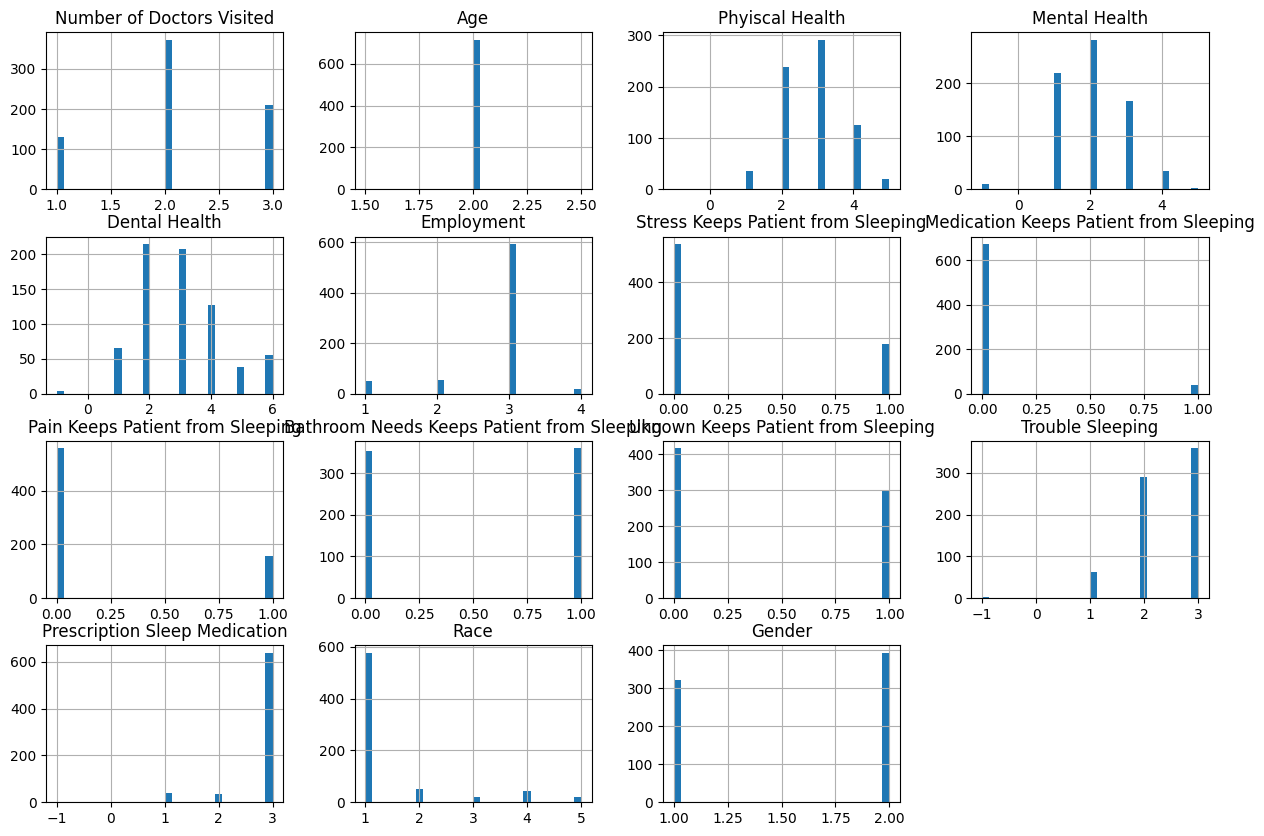

In [9]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

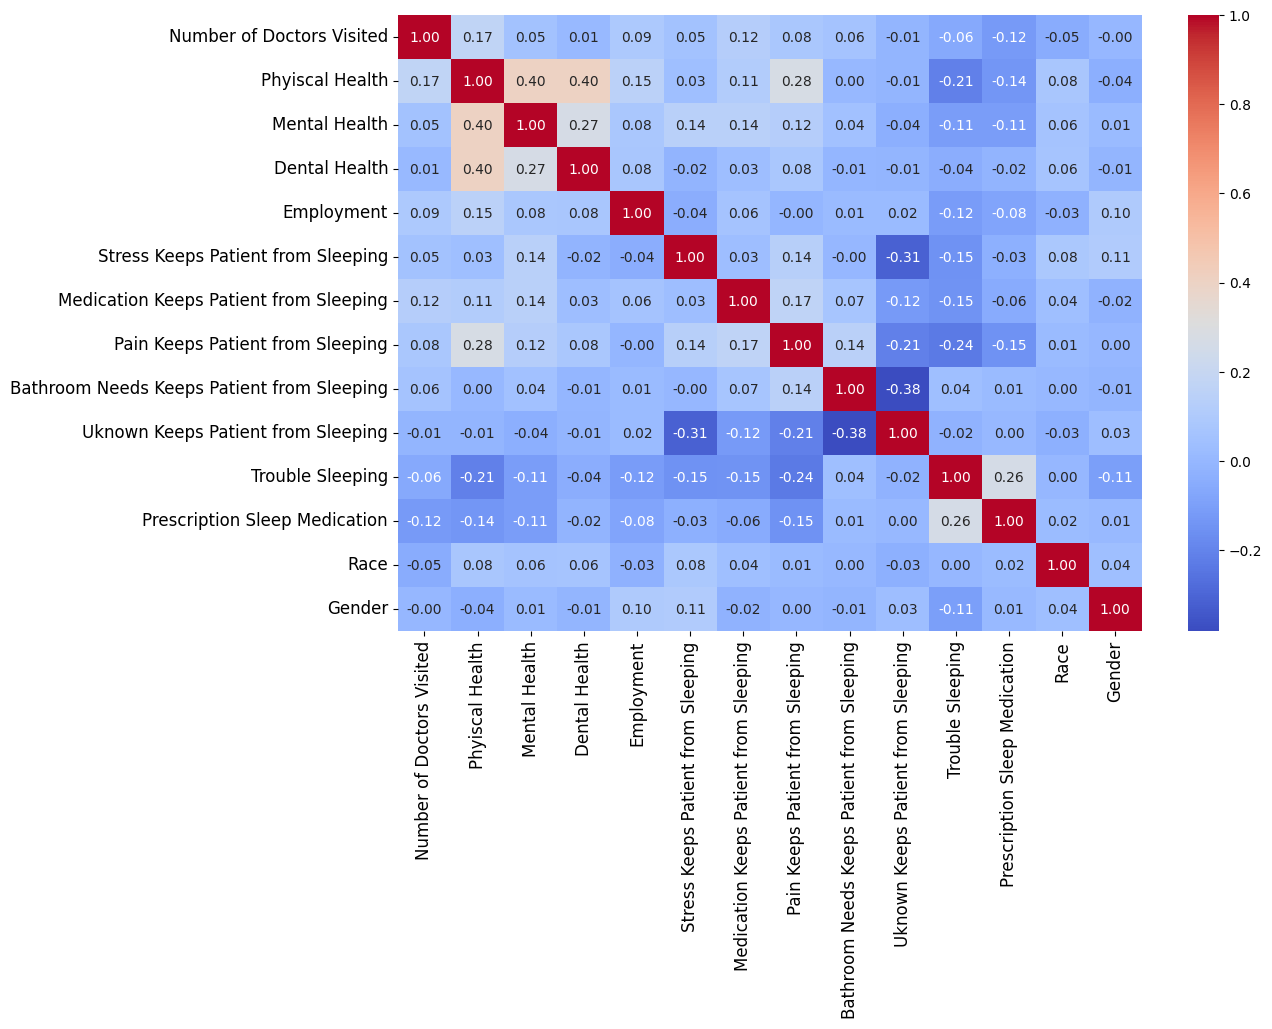

In [16]:
corr = df.drop(columns=['Age']).corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 10}, fmt='.2f')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


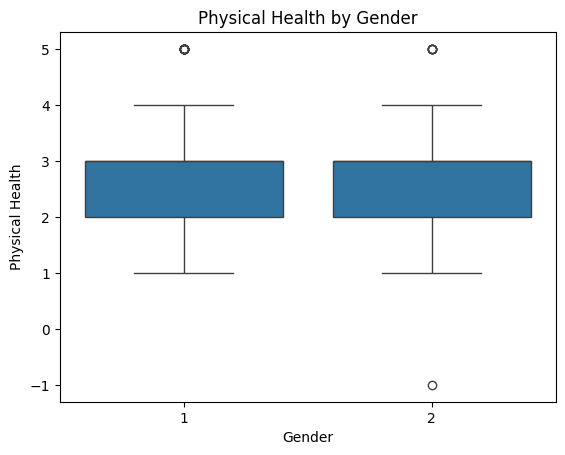

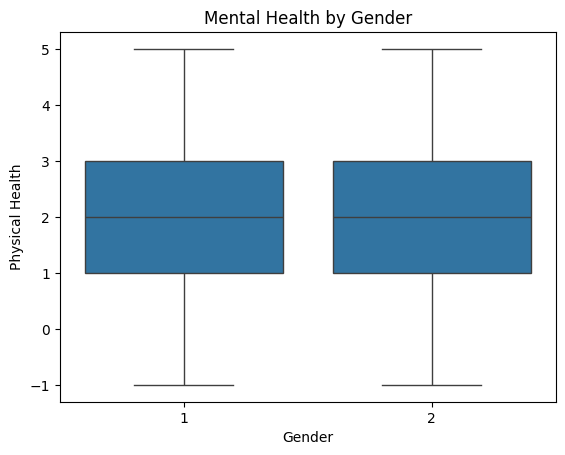

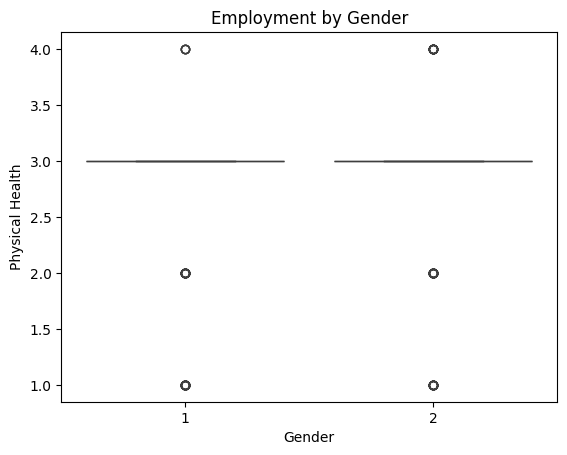

In [31]:
sns.boxplot(x='Gender', y='Phyiscal Health', data=df)
plt.title('Physical Health by Gender')
plt.xlabel('Gender')
plt.ylabel('Physical Health')
plt.show()

sns.boxplot(x='Gender', y='Mental Health', data=df)
plt.title('Mental Health by Gender')
plt.xlabel('Gender')
plt.ylabel('Physical Health')
plt.show()

sns.boxplot(x='Gender', y='Employment', data=df)
plt.title('Employment by Gender')
plt.xlabel('Gender')
plt.ylabel('Physical Health')
plt.show()

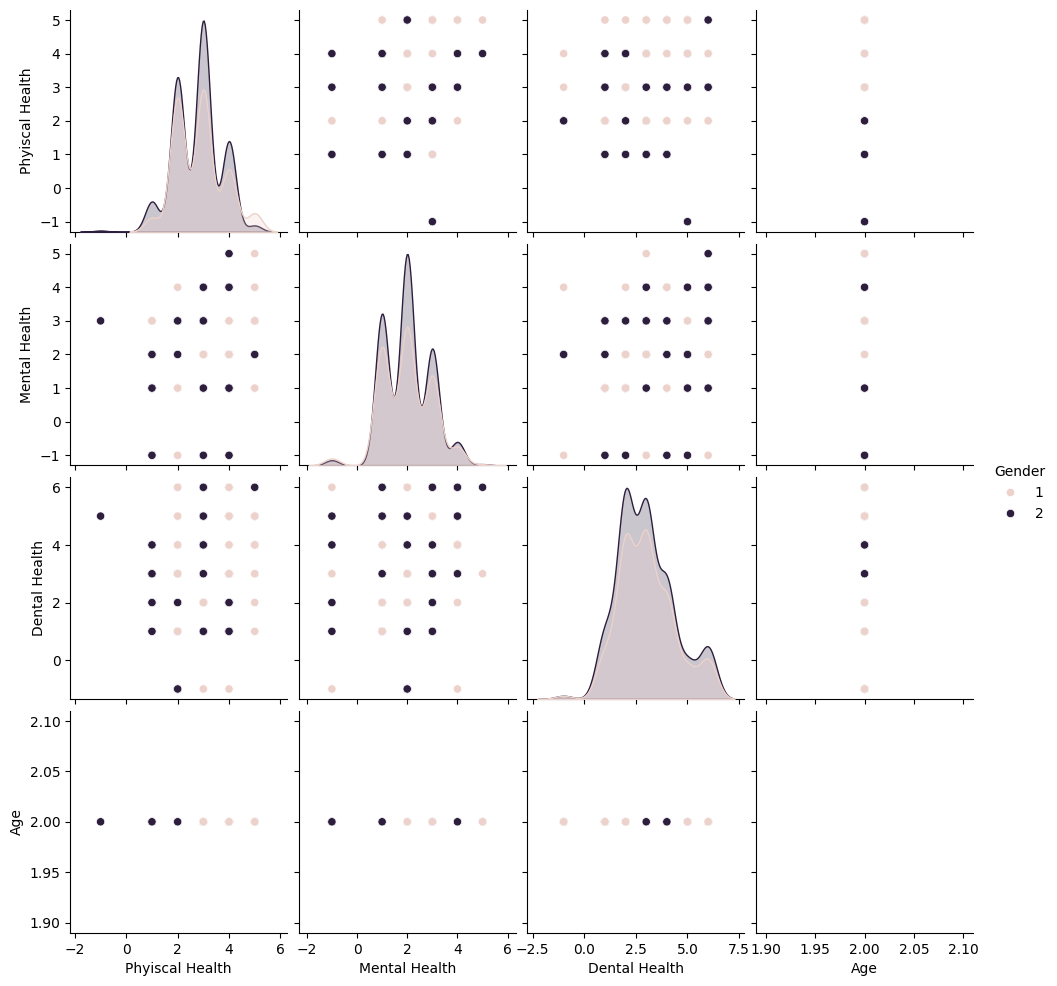

In [20]:
sns.pairplot(df, vars=['Phyiscal Health', 'Mental Health', 'Dental Health', 'Age'], hue='Gender')
plt.show()

In [32]:
print("Physical Health vs Gender")
gender_stats = df.groupby('Gender')['Phyiscal Health'].describe()
print(gender_stats)

print("Mental Health vs Gender")
gender_stats = df.groupby('Gender')['Mental Health'].describe()
print(gender_stats)

print("Employment vs Gender")
gender_stats = df.groupby('Gender')['Employment'].describe()
print(gender_stats)


Physical Health vs Gender
        count      mean       std  min  25%  50%  75%  max
Gender                                                    
1       321.0  2.831776  0.923505  1.0  2.0  3.0  3.0  5.0
2       393.0  2.763359  0.882067 -1.0  2.0  3.0  3.0  5.0
Mental Health vs Gender
        count      mean       std  min  25%  50%  75%  max
Gender                                                    
1       321.0  1.975078  0.977562 -1.0  1.0  2.0  3.0  5.0
2       393.0  2.000000  0.909137 -1.0  1.0  2.0  3.0  5.0
Employment vs Gender
        count      mean       std  min  25%  50%  75%  max
Gender                                                    
1       321.0  2.741433  0.641139  1.0  3.0  3.0  3.0  4.0
2       393.0  2.860051  0.532856  1.0  3.0  3.0  3.0  4.0


In [28]:

# Split the data into two groups based on gender
group1 = df[df['Gender'] == 1]['Phyiscal Health']
group2 = df[df['Gender'] == 2]['Phyiscal Health']

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 1.0094243279638107, P-Value: 0.3131140888061956
